In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, date
import seaborn as sns

# Load Data
* Handle missing values, duplicated values, outlier

In [15]:
total = pd.read_csv("https://raw.githubusercontent.com/lavibula/ML20222.PredictionBitcoin/main/data/saved_data_ASC.csv")
total['Date'] = pd.to_datetime(total['Date'])

df = total.set_index('Date')
df.head()

,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,Total_Fees(USD),...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-20,0.1,0.1,0.1,0.1,0.26,936.0,182.0,1090.745856,789700.0,0.000000,...,0.0,0.0,0.0,0.0,1191.7,17.693,0.00,1083.48,10229.96,9300.46
2010-07-21,0.1,0.1,0.1,0.1,0.58,784.0,182.0,603.821256,499964.0,0.000000,...,0.0,0.0,0.0,0.0,1191.8,17.803,0.00,1069.59,10120.53,9278.83
2010-07-22,0.1,0.1,0.1,0.1,2.16,594.0,182.0,572.443182,403000.0,0.000000,...,0.0,0.0,0.0,0.0,1195.6,18.120,7002.75,1093.67,10322.30,9220.88
2010-07-23,0.1,0.1,0.1,0.1,2.40,655.0,182.0,530.932990,412004.0,0.000606,...,0.0,0.0,0.0,0.0,1187.8,18.101,7018.25,1102.66,10424.62,9430.96
2010-07-24,0.1,0.1,0.1,0.1,0.50,959.0,182.0,1519.539683,1148772.0,0.000000,...,0.0,0.0,0.0,0.0,1187.8,18.101,7018.25,1102.66,10424.62,9430.96


In [16]:
df.shape

(4654, 23)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4654 entries, 2010-07-20 to 2023-04-16
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   BTC_close                   4654 non-null   float64
 1   BTC_open                    4654 non-null   float64
 2   BTC_high                    4654 non-null   float64
 3   BTC_low                     4654 non-null   float64
 4   BTC_volume                  4654 non-null   float64
 5   Active_Addr_Cnt             4654 non-null   float64
 6   Difficulty                  4654 non-null   float64
 7   Mean_Block_Size(in_bytes)   4654 non-null   float64
 8   Sum_Block_Weight            4654 non-null   float64
 9   Total_Fees(USD)             4654 non-null   float64
 10  Mean_Hashrate               4654 non-null   float64
 11  Xfer_Cnt                    4654 non-null   float64
 12  Mean_Tx_size(native_units)  4654 non-null   float64
 13  ETH            

In [18]:
df.describe()

,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,Total_Fees(USD),...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
count,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4.654000e+03,4.654000e+03,4.654000e+03,4.654000e+03,4.654000e+03,...,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000
mean,8950.828126,8944.396197,9182.648904,8680.543532,144.272183,4.974545e+05,7.399910e+12,6.883463e+05,3.329426e+08,5.498044e+05,...,505.010290,45.052975,0.026408,0.229873,1474.337129,21.657901,7112.199345,2492.349280,21487.496401,18751.425404
std,14517.759120,14515.100053,14900.138248,14078.916437,199.685947,3.731797e+05,1.103629e+13,4.990862e+05,2.151278e+08,1.528054e+06,...,945.449318,63.364718,0.069391,0.334681,253.778406,6.479395,1491.343889,989.044608,7511.506584,6322.971966
min,0.100000,0.100000,0.100000,0.000000,0.170000,4.080000e+02,1.820000e+02,4.164167e+02,2.841400e+05,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,1049.600000,11.772000,0.000000,1047.220000,9985.810000,8160.010000
25%,140.475000,140.400000,145.800000,135.825000,25.407500,8.702175e+04,1.322172e+08,1.656955e+05,1.124594e+08,3.741492e+03,...,0.000000,0.000000,0.000000,0.000000,1260.025000,16.624500,5947.125000,1697.435000,15464.300000,14313.030000
50%,916.050000,915.050000,934.150000,877.350000,63.605000,5.389900e+05,2.840750e+11,7.887917e+05,4.066180e+08,6.090908e+04,...,12.430000,3.870000,0.000000,0.008870,1371.850000,19.570000,6962.000000,2204.720000,19161.280000,19435.830000
75%,9932.450000,9926.450000,10231.950000,9636.050000,158.375000,8.174050e+05,1.389755e+13,1.087807e+06,5.072356e+08,4.321621e+05,...,396.107500,67.199500,0.003335,0.350712,1721.025000,25.340750,8151.437500,3046.155000,26828.202500,22902.512500
max,67527.900000,67528.700000,68990.600000,66334.900000,999.530000,1.366494e+06,4.788780e+13,2.535436e+06,7.584308e+08,2.139776e+07,...,4808.380000,386.820000,0.686880,2.780000,2069.400000,48.599000,10674.000000,4796.560000,36799.650000,30670.100000


<Axes: >

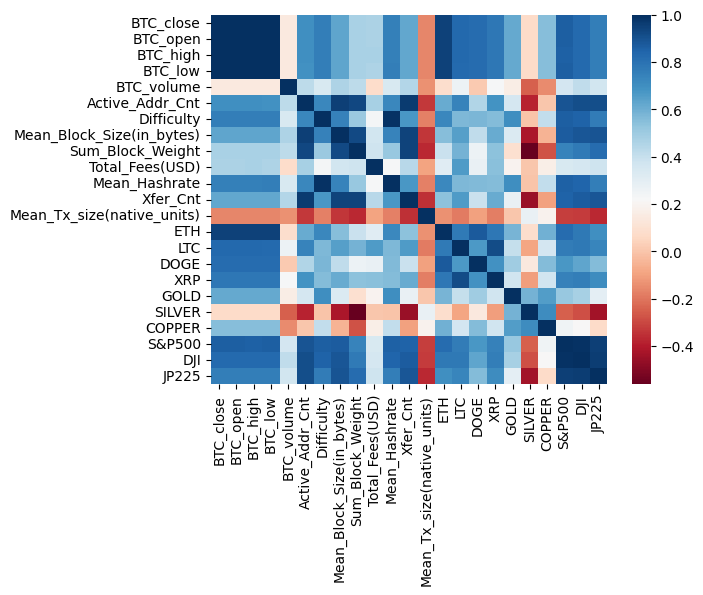

In [19]:
sns.heatmap(df.corr(), cmap="RdBu")

# Slpit Data (Testing, Training Data Sets)

In [20]:
from datetime import datetime
Start_day = date(2016, 3, 10)
End_day = date(2023,4,16)
# train, test

for index in total.index:
    total.loc[index, "Date"] = datetime.strptime(str(total.loc[index, "Date"])[:10], '%Y-%m-%d').date()
total = total[(total["Date"] >= Start_day) & (total["Date"] <= End_day)].reset_index(drop = True)
X = total.drop(["Date"], axis=1)[:-1]
y = total["BTC_close"][1:]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

# In thông tin kích thước các tập dữ liệu
print("Kích thước X_train:", X_train.shape)
print("Kích thước y_train:", y_train.shape)
print("Kích thước X_test:", X_test.shape)
print("Kích thước y_test:", y_test.shape)

Kích thước X_train: (1944, 23)
Kích thước y_train: (1944,)
Kích thước X_test: (649, 23)
Kích thước y_test: (649,)


# Load Model

In [22]:
#import sklearn modules
import time
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the range of values for n_estimators
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_features = ['sqrt', 'log2', None]
bootstrap = [True, False] # method used to sample data points

param_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'bootstrap': bootstrap}

print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['sqrt', 'log2', None], 'max_depth': [2, 4, 6, 8, 10], 'bootstrap': [True, False]}


In [24]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [25]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 100, verbose=2, n_jobs = -1)

In [26]:
rf_Grid.fit(X_train, y_train)

Fitting 100 folds for each of 300 candidates, totalling 30000 fits
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time= 

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_e

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_e

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_e

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_e

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_e

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_e

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_e

[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=400; total time=   2.2s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=400; total time=   2.2s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=400; total time=   2.6s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=400; total time=   2.3s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_e

[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.7s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_e

[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=400; total time=   2.6s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=400; total time=   2.3s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=400; total time=   2.3s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_e

[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.7s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_e

[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=400; total time=   2.5s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=400; total time=   2.3s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=400; total time=   2.3s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_e

[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=400; total time=   2.6s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=400; total time=   2.3s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=400; total time=   2.4s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_e

[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.7s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_e

[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.7s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_estimators=500; total time=   2.7s
[CV] END bootstrap=True, max_depth=2, max_features=log2, n_e

[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=800; total time=  11.3s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=800; total time=  11.7s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=800; total time=  11.2s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=800; total time=  11.2s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=800; total time=  11.2s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=800; total time=  11.2s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  12.5s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  12.9s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.8s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.3s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_e

[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  12.6s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  12.7s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.9s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.1s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.6s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.5s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.4s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.6s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.5s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.3s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_e

[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=800; total time=  11.3s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=800; total time=  11.3s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=800; total time=  11.2s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  12.6s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.0s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.8s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.3s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.8s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.5s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.6s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_e

[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=800; total time=  11.3s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  12.6s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.0s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.8s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.2s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.6s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.3s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.6s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.6s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.5s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_e

[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=800; total time=  11.2s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=800; total time=  11.3s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=800; total time=  11.3s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=800; total time=  11.3s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=800; total time=  11.3s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  12.7s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.5s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.3s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.5s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.5s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_e

[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=800; total time=  11.3s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=800; total time=  11.4s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  12.7s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.8s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.3s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.6s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.5s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.5s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.7s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.6s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_e

[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  12.7s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.8s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.1s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.6s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.6s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.5s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.7s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.5s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.4s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  12.9s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_e

[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.6s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.2s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.6s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.4s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.5s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.7s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.5s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  13.3s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  12.9s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_estimators=900; total time=  12.8s
[CV] END bootstrap=True, max_depth=2, max_features=None, n_e

[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_e

[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_e

[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_e

[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_e

[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=400; total time=   2.9s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=400; total time=   2.9s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_e

[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_e

[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=400; total time=   2.8s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=400; total time=   2.9s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=400; total time=   3.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=400; total time=   3.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=400; total time=   3.0s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_e

[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=400; total time=   2.8s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=400; total time=   2.9s
[CV] END bootstrap=True, max_depth=4, max_features=log2, n_e

[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.2s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.5s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.4s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.4s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  15.0s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.9s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  15.1s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.9s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.5s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.2s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_e

[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.2s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.8s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.9s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  15.0s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  15.0s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.5s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.2s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.2s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.4s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  16.8s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_e

[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.4s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.4s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.1s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.9s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.9s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  15.0s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.9s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.6s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.2s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.2s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_e

[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  17.5s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  17.9s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  18.6s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  18.4s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  17.6s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  16.9s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  17.0s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  16.5s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  17.4s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=800; total time=  19.2s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_e

[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.2s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.4s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.3s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.3s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.5s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  15.1s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  15.1s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  15.2s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.8s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.3s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_e

[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=600; total time=  14.3s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  17.2s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  16.8s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  16.7s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  16.8s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  18.1s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  17.5s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  19.5s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  17.4s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  17.2s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_e

[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  18.1s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  17.6s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  19.6s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  17.6s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  17.3s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  16.7s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  16.7s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  17.3s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=800; total time=  19.3s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=800; total time=  19.1s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_e

[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  19.4s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  17.5s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  17.4s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  16.7s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  16.7s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=700; total time=  17.3s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=800; total time=  19.5s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=800; total time=  19.2s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=800; total time=  18.9s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=800; total time=  19.9s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_e

[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=900; total time=  24.6s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=900; total time=  25.5s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=900; total time=  24.6s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=900; total time=  24.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=900; total time=  23.3s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=900; total time=  23.3s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=900; total time=  24.4s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=900; total time=  24.3s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=900; total time=  25.2s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=900; total time=  25.5s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_e

[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=900; total time=  23.3s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=900; total time=  23.5s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=900; total time=  24.4s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=900; total time=  24.4s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=900; total time=  25.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=900; total time=  25.6s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  27.5s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  26.7s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  25.9s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  26.7s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt,

[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=900; total time=  23.7s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=900; total time=  23.4s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=900; total time=  24.2s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=900; total time=  24.3s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=900; total time=  24.8s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=900; total time=  25.6s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  27.9s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  26.9s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  26.4s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  26.4s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt,

[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  27.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  27.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  27.8s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=100; total time=   2.8s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=6, max_features=log2, 

[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  27.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  27.2s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  27.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  27.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  27.7s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  26.9s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=100; total time=   2.8s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=6, max_features=log

[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.5s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.5s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.4s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.2s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.2s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.2s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.2s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.2s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.2s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.2s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_e

[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.4s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.5s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.4s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.4s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.2s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.2s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.2s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_e

[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=100; total time=   2.8s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.4s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.5s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.5s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.3s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.2s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.2s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.3s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=200; total time=   5.2s
[CV] END bootstrap=True, max_depth=6, max_features=log2, n_e

[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=200; total time=  19.3s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=200; total time=  17.9s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=200; total time=  17.5s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=300; total time=  26.2s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=300; total time=  27.3s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=300; total time=  27.2s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=300; total time=  28.5s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=300; total time=  26.8s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=300; total time=  26.0s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=300; total time=  26.8s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_e

[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=300; total time=  26.3s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=300; total time=  26.5s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=300; total time=  28.0s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=300; total time=  28.3s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=400; total time=  35.1s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=400; total time=  36.1s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=400; total time=  37.9s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=400; total time=  36.8s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=400; total time=  37.9s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=400; total time=  41.5s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_e

[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=300; total time=  27.1s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=300; total time=  27.7s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=300; total time=  28.1s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=300; total time=  26.2s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=300; total time=  26.2s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=300; total time=  27.2s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=300; total time=  28.6s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=300; total time=  27.4s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=300; total time=  26.2s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=300; total time=  27.0s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_e

[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=400; total time=  36.6s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=400; total time=  36.7s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=400; total time=  38.5s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=400; total time=  37.2s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=400; total time=  35.5s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=400; total time=  38.0s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=500; total time=  46.3s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=500; total time=  44.6s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=500; total time=  45.9s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=500; total time=  45.7s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_e

[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=400; total time=  38.4s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=400; total time=  38.2s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=400; total time=  35.6s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=400; total time=  36.8s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=400; total time=  38.2s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=500; total time=  44.8s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=500; total time=  45.5s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=500; total time=  45.4s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=500; total time=  45.9s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=500; total time=  44.3s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_e

[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  53.2s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  55.1s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  54.1s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  52.6s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  54.6s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  54.6s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  53.0s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  54.7s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  54.9s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  52.5s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_e

[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=500; total time=  44.4s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=500; total time=  45.6s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=500; total time=  44.8s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  52.7s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  54.7s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  54.7s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  52.8s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  53.7s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  54.8s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  53.4s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_e

[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=500; total time=  44.6s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=500; total time=  45.7s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=500; total time=  44.8s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  52.7s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  55.1s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  54.7s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  52.5s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  54.2s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  54.8s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_estimators=600; total time=  53.3s
[CV] END bootstrap=True, max_depth=6, max_features=None, n_e

[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=500; total time=  12.6s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=600; total time=  14.9s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=600; total time=  15.3s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=600; total time=  15.6s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=600; total time=  15.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=600; total time=  14.9s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=600; total time=  14.9s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=600; total time=  14.9s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=600; total time=  14.8s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=600; total time=  15.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_e

[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=700; total time=  17.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=700; total time=  17.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=700; total time=  17.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=700; total time=  17.8s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=700; total time=  18.3s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=700; total time=  17.7s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=700; total time=  17.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=700; total time=  17.6s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=700; total time=  17.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=700; total time=  17.7s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_e

[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=700; total time=  17.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=700; total time=  17.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=700; total time=  17.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=700; total time=  17.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=700; total time=  17.6s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=700; total time=  17.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=800; total time=  20.3s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=800; total time=  20.8s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=800; total time=  20.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=800; total time=  19.9s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_e

[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=700; total time=  17.6s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=700; total time=  17.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=800; total time=  20.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=800; total time=  20.7s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=800; total time=  20.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=800; total time=  20.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=800; total time=  19.8s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=800; total time=  20.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=800; total time=  20.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=800; total time=  19.9s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_e

[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=900; total time=  22.6s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=900; total time=  22.9s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=900; total time=  22.9s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=900; total time=  22.9s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=900; total time=  22.3s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=900; total time=  22.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=900; total time=  22.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=900; total time=  22.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=900; total time=  22.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=900; total time=  22.3s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_e

[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=900; total time=  23.3s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=900; total time=  22.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=900; total time=  22.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=900; total time=  22.6s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=900; total time=  22.3s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=900; total time=  22.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=900; total time=  22.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=900; total time=  22.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  24.9s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  25.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n

[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  26.3s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  24.6s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  24.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  25.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  25.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  24.2s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  25.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  25.9s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  24.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  24.2s
[CV] END bootstrap=True, max_depth=8, max_features

[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  25.6s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  25.3s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  24.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  25.3s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  25.8s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  24.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  24.3s
[CV] END bootstrap=True, max_depth=8, max_features=log2, n_estimators=100; total time=   2.5s
[CV] END bootstrap=True, max_depth=8, max_features=log2, n_estimators=100; total time=   2.6s
[CV] END bootstrap=True, max_depth=8, max_features=log2, n_estimators=100; total time=   2.5s
[CV] END bootstrap=True, max_depth=8, max_features=lo

[CV] END bootstrap=True, max_depth=8, max_features=log2, n_estimators=1000; total time=  25.7s
[CV] END bootstrap=True, max_depth=8, max_features=log2, n_estimators=1000; total time=  28.8s
[CV] END bootstrap=True, max_depth=8, max_features=log2, n_estimators=1000; total time=  27.5s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=100; total time=   9.9s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=100; total time=  10.0s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=100; total time=  10.0s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=100; total time=  10.0s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=100; total time=  10.0s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=100; total time=   9.9s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=100; total time=  10.0s
[CV] END bootstrap=True, max_depth=8, max_features=None, 

[CV] END bootstrap=True, max_depth=8, max_features=log2, n_estimators=900; total time=  23.2s
[CV] END bootstrap=True, max_depth=8, max_features=log2, n_estimators=1000; total time=  25.9s
[CV] END bootstrap=True, max_depth=8, max_features=log2, n_estimators=1000; total time=  25.9s
[CV] END bootstrap=True, max_depth=8, max_features=log2, n_estimators=1000; total time=  26.7s
[CV] END bootstrap=True, max_depth=8, max_features=log2, n_estimators=1000; total time=  26.0s
[CV] END bootstrap=True, max_depth=8, max_features=log2, n_estimators=1000; total time=  25.9s
[CV] END bootstrap=True, max_depth=8, max_features=log2, n_estimators=1000; total time=  26.1s
[CV] END bootstrap=True, max_depth=8, max_features=log2, n_estimators=1000; total time=  25.9s
[CV] END bootstrap=True, max_depth=8, max_features=log2, n_estimators=1000; total time=  25.6s
[CV] END bootstrap=True, max_depth=8, max_features=log2, n_estimators=1000; total time=  25.8s
[CV] END bootstrap=True, max_depth=8, max_features=

[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=100; total time=  10.0s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=100; total time=   9.9s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=100; total time=  10.0s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=100; total time=  10.0s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=100; total time=   9.9s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=100; total time=  10.0s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=100; total time=   9.9s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=100; total time=  10.0s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=100; total time=  10.0s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=100; total time=  10.5s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_e

[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=100; total time=   9.9s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=100; total time=  10.0s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=100; total time=  10.0s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=100; total time=  10.2s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=100; total time=  10.3s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=200; total time=  20.1s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=200; total time=  20.5s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=200; total time=  20.8s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=200; total time=  20.3s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=200; total time=  20.3s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_e

[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=200; total time=  20.0s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=300; total time=  30.0s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=300; total time=  30.3s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=300; total time=  30.1s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=300; total time=  31.2s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=300; total time=  30.4s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=300; total time=  29.9s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=300; total time=  29.9s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=300; total time=  30.6s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=300; total time=  31.7s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_e

[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=400; total time=  39.9s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=400; total time=  41.4s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=400; total time=  42.1s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=400; total time=  40.1s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=400; total time=  41.2s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=400; total time=  41.5s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=400; total time=  40.7s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=400; total time=  40.8s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=500; total time=  52.0s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=500; total time=  52.4s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_e

[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=300; total time=  29.9s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=300; total time=  30.1s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=300; total time=  31.3s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=300; total time=  30.9s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=300; total time=  29.9s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=300; total time=  31.3s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=300; total time=  31.2s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=400; total time=  40.9s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=400; total time=  40.0s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=400; total time=  41.4s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_e

[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=400; total time=  41.3s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=400; total time=  40.0s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=400; total time=  41.8s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=500; total time=  52.2s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=500; total time=  50.9s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=500; total time=  52.0s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=500; total time=  51.9s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=500; total time=  52.1s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=500; total time=  50.5s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=500; total time=  52.6s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_e

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  13.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  13.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  12.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  12.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  12.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  12.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  13.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  13.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  13.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  12.9s
[CV] END bootstrap=True, max_depth=10, max_feature

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  12.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  13.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  13.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  13.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  12.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  12.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  12.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=500; total time=  16.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=500; total time=  16.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=500; total time=  16.0s
[CV] END bootstrap=True, max_depth=10, max_feature

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  12.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  12.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  12.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  12.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  13.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  13.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  12.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  12.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  12.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=400; total time=  12.8s
[CV] END bootstrap=True, max_depth=10, max_feature

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=600; total time=  19.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=600; total time=  19.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=600; total time=  19.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=600; total time=  19.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=600; total time=  19.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=600; total time=  19.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=600; total time=  18.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=600; total time=  18.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=600; total time=  18.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=700; total time=  22.9s
[CV] END bootstrap=True, max_depth=10, max_feature

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=600; total time=  19.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=600; total time=  19.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=600; total time=  19.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=600; total time=  19.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=600; total time=  19.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=600; total time=  19.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=600; total time=  19.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=600; total time=  19.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=600; total time=  19.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=600; total time=  19.0s
[CV] END bootstrap=True, max_depth=10, max_feature

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=700; total time=  23.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=700; total time=  23.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=700; total time=  22.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=700; total time=  22.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=700; total time=  22.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=700; total time=  21.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=700; total time=  22.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=700; total time=  22.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=800; total time=  25.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=800; total time=  25.9s
[CV] END bootstrap=True, max_depth=10, max_feature

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=800; total time=  26.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=800; total time=  25.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=800; total time=  25.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=800; total time=  25.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=800; total time=  26.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=800; total time=  27.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=800; total time=  26.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=800; total time=  25.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=800; total time=  24.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=800; total time=  25.3s
[CV] END bootstrap=True, max_depth=10, max_feature

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=900; total time=  29.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=900; total time=  28.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=900; total time=  28.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=900; total time=  28.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=900; total time=  29.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=900; total time=  29.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=900; total time=  27.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=900; total time=  28.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=900; total time=  29.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=900; total time=  29.8s
[CV] END bootstrap=True, max_depth=10, max_feature

[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=900; total time=  29.9s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=1000; total time=  33.3s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=1000; total time=  31.8s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=1000; total time=  31.1s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=1000; total time=  32.1s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=1000; total time=  32.7s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=1000; total time=  33.3s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=1000; total time=  32.5s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=1000; total time=  31.1s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=1000; total time=  31.8s
[CV] END bootstrap=True, max_depth=10, ma

[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=900; total time=  29.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=900; total time=  30.1s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=1000; total time=  33.2s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=1000; total time=  31.8s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=1000; total time=  30.9s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=1000; total time=  32.3s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=1000; total time=  32.8s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=1000; total time=  33.1s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=1000; total time=  32.4s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=1000; total time=  31.1s
[CV] END bootstrap=True, max_depth=10, max

[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=700; total time=  23.1s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=700; total time=  23.5s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=700; total time=  23.4s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=700; total time=  22.6s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=700; total time=  23.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=  25.7s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=  25.9s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=  25.8s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=  26.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=  27.0s
[CV] END bootstrap=True, max_depth=10, max_feature

[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=700; total time=  22.5s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=700; total time=  23.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=  25.7s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=  25.8s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=  25.7s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=  26.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=  26.8s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=  26.8s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=  26.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=  25.7s
[CV] END bootstrap=True, max_depth=10, max_feature

[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=  25.7s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=  25.9s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=  26.7s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=  26.8s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=  26.2s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=  26.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=  25.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=  25.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=  25.8s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=  27.3s
[CV] END bootstrap=True, max_depth=10, max_feature

[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=100; total time=  12.7s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=100; total time=  12.6s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=100; total time=  13.2s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=100; total time=  12.6s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=100; total time=  12.8s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=100; total time=  12.7s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=100; total time=  12.6s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=100; total time=  12.7s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=200; total time=  25.4s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=200; total time=  25.3s
[CV] END bootstrap=True, max_depth=10, max_feature

[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=200; total time=  24.9s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=300; total time=  36.7s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=300; total time=  38.0s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=300; total time=  38.0s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=300; total time=  38.3s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=300; total time=  38.0s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=300; total time=  38.1s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=300; total time=  39.1s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=300; total time=  38.0s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=300; total time=  38.1s
[CV] END bootstrap=True, max_depth=10, max_feature

[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=100; total time=  12.7s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=200; total time=  25.3s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=200; total time=  25.5s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=200; total time=  25.3s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=200; total time=  24.4s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=200; total time=  24.2s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=200; total time=  25.5s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=200; total time=  25.3s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=200; total time=  25.3s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=200; total time=  25.4s
[CV] END bootstrap=True, max_depth=10, max_feature

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=200; total time=   3.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=200; total time=   3.0s
[CV] END bootstrap=False, max_depth=2, max_feature

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=200; total time=   3.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=200; total time=   3.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.4s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.4s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.3s
[CV] END bootstrap=False, max_depth=2, max_feature

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.4s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.3s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.3s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.4s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.5s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.3s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.4s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.4s
[CV] END bootstrap=False, max_depth=2, max_feature

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=200; total time=   3.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.4s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.3s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.3s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.5s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.4s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.3s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.4s
[CV] END bootstrap=False, max_depth=2, max_feature

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.5s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.3s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.3s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.4s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.3s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.4s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.3s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.3s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.4s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=400; total time=   5.8s
[CV] END bootstrap=False, max_depth=2, max_feature

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.3s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   4.3s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=400; total time=   5.8s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=400; total time=   5.7s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=400; total time=   5.8s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=400; total time=   5.8s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=400; total time=   5.8s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=400; total time=   5.8s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=400; total time=   5.7s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=400; total time=   5.9s
[CV] END bootstrap=False, max_depth=2, max_feature

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=500; total time=   7.2s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=500; total time=   7.2s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=500; total time=   7.2s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=500; total time=   7.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=500; total time=   7.3s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=500; total time=   7.2s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=500; total time=   7.2s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=500; total time=   7.3s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=500; total time=   7.2s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=500; total time=   7.3s
[CV] END bootstrap=False, max_depth=2, max_feature

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=700; total time=  10.7s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=700; total time=  10.6s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=700; total time=  10.2s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=700; total time=  10.3s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=700; total time=  10.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=700; total time=  10.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=700; total time=   9.9s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=700; total time=   9.8s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=700; total time=   9.7s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=700; total time=   9.8s
[CV] END bootstrap=False, max_depth=2, max_feature

[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=500; total time=   7.2s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=500; total time=   7.1s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=500; total time=   7.3s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=500; total time=   7.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=500; total time=   7.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   8.2s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   8.5s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   8.9s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   8.7s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   8.6s
[CV] END bootstrap=False, max_depth=2, max_feature

[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   9.1s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   8.9s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   9.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   9.1s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   8.6s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=700; total time=  10.5s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=700; total time=  10.1s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=700; total time=  10.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=700; total time=  10.1s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=700; total time=  10.0s
[CV] END bootstrap=False, max_depth=2, max_feature

[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   8.5s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   8.8s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   8.7s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   8.6s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   8.8s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   8.8s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   9.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   9.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   9.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   9.1s
[CV] END bootstrap=False, max_depth=2, max_feature

[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   9.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   9.1s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   8.6s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=700; total time=  10.3s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=700; total time=  10.2s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=700; total time=  10.1s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=700; total time=  10.1s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=700; total time=  10.1s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=700; total time=  10.1s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=700; total time=  10.5s
[CV] END bootstrap=False, max_depth=2, max_feature

[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   8.8s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=600; total time=   8.7s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=700; total time=  10.2s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=700; total time=  10.1s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=700; total time=  10.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=700; total time=  10.2s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=700; total time=  10.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=700; total time=  10.2s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=700; total time=  10.6s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=700; total time=  10.1s
[CV] END bootstrap=False, max_depth=2, max_feature

[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=700; total time=  10.2s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=700; total time=  10.1s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=700; total time=  10.2s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=800; total time=  11.6s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=800; total time=  11.7s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=800; total time=  11.5s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=800; total time=  11.8s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=800; total time=  11.6s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=800; total time=  11.5s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=800; total time=  12.5s
[CV] END bootstrap=False, max_depth=2, max_feature

[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=900; total time=  13.4s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=900; total time=  13.3s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=900; total time=  13.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=900; total time=  13.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=900; total time=  13.3s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=900; total time=  13.2s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=900; total time=  13.2s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=900; total time=  13.0s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=900; total time=  13.5s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=1000; total time=  14.6s
[CV] END bootstrap=False, max_depth=2, max_featur

[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=1000; total time=  14.5s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=1000; total time=  14.5s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=100; total time=   5.1s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=100; total time=   5.0s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=100; total time=   5.1s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=100; total time=   5.1s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=100; total time=   5.0s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=100; total time=   5.0s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=100; total time=   5.1s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=100; total time=   5.0s
[CV] END bootstrap=False, max_depth=2, max_featu

[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=900; total time=  45.4s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=900; total time=  45.1s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=900; total time=  45.0s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=900; total time=  44.1s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=900; total time=  44.5s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=900; total time=  45.0s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=900; total time=  44.8s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=900; total time=  45.4s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  51.0s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  50.4s
[CV] END bootstrap=False, max_depth=2, max_featu

[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  49.0s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  50.2s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  50.3s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  50.4s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  49.9s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  50.0s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  49.7s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  49.5s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  50.8s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=4, ma

[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=900; total time=  45.5s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  50.4s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  50.9s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  50.2s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  48.4s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  50.5s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  50.4s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  50.5s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  50.0s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  50.2s
[CV] END bootstrap=False, max_depth=2, ma

[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  50.2s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  50.1s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  48.6s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  51.3s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  50.3s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=100; total time=   2.3s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=4, max_fe

[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  50.5s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  50.0s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  50.3s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  50.2s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  48.6s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  51.2s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=1000; total time=  50.3s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=4, max_

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=100; total time=   2.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=100; total time=   2.3s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=4, max_feature

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=200; total time=   4.3s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=200; total time=   4.3s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=200; total time=   4.4s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=200; total time=   4.3s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=300; total time=   6.6s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=300; total time=   6.5s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=300; total time=   6.6s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=300; total time=   6.5s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=300; total time=   6.6s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=300; total time=   6.8s
[CV] END bootstrap=False, max_depth=4, max_feature

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=500; total time=  11.6s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=500; total time=  11.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=500; total time=  10.9s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=500; total time=  10.8s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=500; total time=  10.8s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=500; total time=  11.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=500; total time=  10.8s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=500; total time=  10.9s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=500; total time=  10.9s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=500; total time=  10.9s
[CV] END bootstrap=False, max_depth=4, max_feature

[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=200; total time=   4.4s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=200; total time=   4.4s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=300; total time=   6.5s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=300; total time=   6.7s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=300; total time=   6.8s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=300; total time=   6.8s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=300; total time=   6.8s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=300; total time=   6.9s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=300; total time=   6.8s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=300; total time=   6.8s
[CV] END bootstrap=False, max_depth=4, max_feature

[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=300; total time=   6.6s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=300; total time=   6.9s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=300; total time=   6.8s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=300; total time=   6.8s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=300; total time=   6.9s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=300; total time=   6.7s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=300; total time=   6.8s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=300; total time=   6.8s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=300; total time=   6.8s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=300; total time=   6.6s
[CV] END bootstrap=False, max_depth=4, max_feature

[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=400; total time=   8.8s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=400; total time=   8.7s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=400; total time=   8.9s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=400; total time=   8.8s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=400; total time=   9.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=400; total time=   8.8s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=400; total time=   9.1s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=400; total time=   9.1s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  11.4s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  11.4s
[CV] END bootstrap=False, max_depth=4, max_feature

[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  11.4s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  11.5s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  11.3s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  11.1s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  10.9s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  11.1s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  10.9s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  10.9s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  11.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  10.9s
[CV] END bootstrap=False, max_depth=4, max_feature

[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=400; total time=   8.8s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=400; total time=   8.7s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=400; total time=   8.8s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=400; total time=   8.9s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=400; total time=   9.1s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  11.4s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  11.5s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  11.3s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  11.2s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  10.9s
[CV] END bootstrap=False, max_depth=4, max_feature

[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  11.4s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  11.4s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  11.4s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  11.4s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  10.9s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  11.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  11.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  10.9s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  11.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=500; total time=  11.0s
[CV] END bootstrap=False, max_depth=4, max_feature

[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=600; total time=  13.8s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=600; total time=  13.7s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=600; total time=  13.6s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=600; total time=  13.1s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=600; total time=  13.5s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=600; total time=  13.8s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=600; total time=  13.2s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=600; total time=  13.2s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=600; total time=  13.4s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=700; total time=  15.3s
[CV] END bootstrap=False, max_depth=4, max_feature

[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=800; total time=  17.5s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=800; total time=  17.6s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=800; total time=  18.0s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=800; total time=  18.2s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=900; total time=  20.5s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=900; total time=  20.3s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=900; total time=  19.6s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=900; total time=  19.7s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=900; total time=  19.6s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=900; total time=  19.6s
[CV] END bootstrap=False, max_depth=4, max_feature

[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=600; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=600; total time=  58.6s
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=600; total time=  57.9s
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=600; total time=  58.3s
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=700; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=700; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=700; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=700; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=700; total time= 1.0min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=700; total time= 1.0min
[CV] END bootstrap=False, max_depth=4, max_feature

[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=600; total time=  58.1s
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=600; total time=  58.1s
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=600; total time=  58.1s
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=700; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=700; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=700; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=700; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=700; total time= 1.0min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=700; total time= 1.0min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=700; total time= 1.0min
[CV] END bootstrap=False, max_depth=4, max_feature

[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_feature

[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=900; total time= 1.2min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=900; total time= 1.2min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=900; total time= 1.2min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=900; total time= 1.2min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=900; total time= 1.2min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=900; total time= 1.2min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=900; total time= 1.2min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=900; total time= 1.2min
[CV] END bootstrap=False, max_depth=4, max_feature

[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=900; total time= 1.2min
[CV] END bootstrap=False, max_depth=4, max_feature

[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=800; total time= 1.1min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=900; total time= 1.2min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=900; total time= 1.2min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=900; total time= 1.2min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=900; total time= 1.2min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=900; total time= 1.2min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=900; total time= 1.2min
[CV] END bootstrap=False, max_depth=4, max_feature

[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=1000; total time= 1.3min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=1000; total time= 1.3min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=1000; total time= 1.3min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=1000; total time= 1.4min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=1000; total time= 1.3min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=1000; total time= 1.3min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=1000; total time= 1.3min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=1000; total time= 1.3min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=1000; total time= 1.3min
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=1000; total time= 1.2min
[CV] END bootstrap=False, max_depth=4, m

[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=300; total time=   7.2s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=300; total time=   7.2s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=300; total time=   7.2s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=300; total time=   7.2s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=300; total time=   7.2s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=300; total time=   7.4s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=300; total time=   8.2s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=300; total time=   7.4s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=300; total time=   7.7s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=300; total time=   7.4s
[CV] END bootstrap=False, max_depth=6, max_feature

[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=900; total time=  22.2s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=900; total time=  21.9s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=900; total time=  18.9s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=900; total time=  17.8s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  19.6s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  18.8s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  17.9s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  17.7s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  17.4s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  17.8s
[CV] END bootstrap=False, max_depth=6, max_f

[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=900; total time=  18.8s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=900; total time=  17.9s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  19.5s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  18.9s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  18.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  17.6s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  17.4s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  17.8s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  17.3s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, n_estimators=1000; total time=  16.8s
[CV] END bootstrap=False, max_depth=6, max

[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=100; total time=   1.7s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=100; total time=   1.7s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=100; total time=   1.7s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=100; total time=   1.7s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=100; total time=   1.7s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=200; total time=   3.4s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=200; total time=   3.3s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=200; total time=   3.4s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=200; total time=   3.4s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=200; total time=   3.2s
[CV] END bootstrap=False, max_depth=6, max_feature

[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=300; total time=   4.9s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=300; total time=   4.9s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=300; total time=   5.0s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=300; total time=   4.9s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=300; total time=   4.9s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=300; total time=   4.9s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=300; total time=   5.0s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=300; total time=   5.3s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=300; total time=   5.0s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=300; total time=   5.1s
[CV] END bootstrap=False, max_depth=6, max_feature

[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=200; total time=   3.4s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=200; total time=   3.3s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=200; total time=   3.3s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=200; total time=   3.2s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=200; total time=   3.2s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=200; total time=   3.3s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=200; total time=   3.3s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=200; total time=   3.4s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=200; total time=   3.3s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=200; total time=   3.3s
[CV] END bootstrap=False, max_depth=6, max_feature

[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=200; total time=   3.3s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=200; total time=   3.3s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=200; total time=   3.3s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=300; total time=   4.9s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=300; total time=   4.9s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=300; total time=   5.0s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=300; total time=   4.9s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=300; total time=   4.9s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=300; total time=   4.9s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=300; total time=   5.0s
[CV] END bootstrap=False, max_depth=6, max_feature

[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=400; total time=   6.8s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=400; total time=   6.8s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=500; total time=   8.4s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=500; total time=   8.5s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=500; total time=   8.5s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=500; total time=   8.2s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=500; total time=   8.1s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=500; total time=   8.2s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=500; total time=   8.2s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=500; total time=   8.1s
[CV] END bootstrap=False, max_depth=6, max_feature

[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=600; total time=  10.1s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=600; total time=  10.2s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=600; total time=  10.3s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=600; total time=  10.1s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=700; total time=  11.5s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=700; total time=  11.5s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=700; total time=  11.5s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=700; total time=  11.5s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=700; total time=  11.4s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=700; total time=  11.3s
[CV] END bootstrap=False, max_depth=6, max_feature

[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=300; total time=  21.3s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=300; total time=  22.0s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=300; total time=  21.8s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=300; total time=  21.5s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=300; total time=  21.7s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=300; total time=  21.6s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=300; total time=  21.5s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=300; total time=  21.6s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=400; total time=  28.5s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=400; total time=  28.5s
[CV] END bootstrap=False, max_depth=6, max_feature

[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=300; total time=  21.3s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=300; total time=  20.7s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=300; total time=  21.2s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=300; total time=  21.6s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=300; total time=  21.9s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=300; total time=  21.4s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=300; total time=  21.5s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=300; total time=  21.9s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=300; total time=  21.4s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=300; total time=  21.6s
[CV] END bootstrap=False, max_depth=6, max_feature

[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=500; total time=  35.8s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=500; total time=  36.6s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=500; total time=  35.9s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=500; total time=  35.6s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=500; total time=  35.6s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=500; total time=  35.9s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=500; total time=  35.9s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=500; total time=  35.8s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=600; total time=  43.9s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=600; total time=  43.1s
[CV] END bootstrap=False, max_depth=6, max_feature

[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=600; total time=  43.1s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=600; total time=  42.9s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=700; total time=  51.3s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=700; total time=  50.2s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=700; total time=  50.1s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=700; total time=  50.9s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=700; total time=  50.4s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=700; total time=  50.0s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=700; total time=  51.8s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=700; total time=  50.4s
[CV] END bootstrap=False, max_depth=6, max_feature

[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=500; total time=  35.9s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=500; total time=  35.9s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=600; total time=  43.2s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=600; total time=  43.8s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=600; total time=  43.0s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=600; total time=  42.9s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=600; total time=  42.9s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=600; total time=  43.0s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=600; total time=  43.3s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=600; total time=  43.7s
[CV] END bootstrap=False, max_depth=6, max_feature

[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=600; total time=  43.7s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=600; total time=  43.0s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=600; total time=  42.8s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=600; total time=  43.0s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=600; total time=  43.0s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=600; total time=  43.9s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=700; total time=  50.5s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=700; total time=  50.2s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=700; total time=  50.0s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=700; total time=  51.2s
[CV] END bootstrap=False, max_depth=6, max_feature

[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=800; total time=  57.1s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=800; total time=  58.5s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=800; total time=  58.0s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=800; total time=  58.4s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=800; total time=  58.6s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=900; total time= 1.1min
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=900; total time= 1.1min
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=900; total time= 1.1min
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=900; total time= 1.1min
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=900; total time= 1.1min
[CV] END bootstrap=False, max_depth=6, max_feature

[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=1000; total time= 1.2min
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=1000; total time= 1.2min
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=1000; total time= 1.2min
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=1000; total time= 1.2min
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=1000; total time= 1.2min
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=1000; total time= 1.2min
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=1000; total time=17.3min
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=1000; total time= 1.4min
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=100; total time=   2.7s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=100; total time=   3.0s
[CV] END bootstrap=False, max_depth=8, max

[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=600; total time=  12.5s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=600; total time=  11.8s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=600; total time=  11.8s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=600; total time=  12.2s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=600; total time=  12.2s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=600; total time=  12.7s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=600; total time=  18.8s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=600; total time=  17.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=600; total time=  16.2s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=700; total time=  17.1s
[CV] END bootstrap=False, max_depth=8, max_feature

[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=700; total time=  13.7s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=700; total time=  14.2s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=700; total time=  15.5s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=700; total time=  14.7s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=800; total time=  15.7s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=800; total time=  15.8s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=800; total time=  17.6s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=800; total time=  17.3s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=800; total time=  16.5s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=800; total time=  15.1s
[CV] END bootstrap=False, max_depth=8, max_feature

[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=800; total time=  15.4s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=800; total time=  16.9s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=800; total time=  18.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=800; total time=  17.4s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=800; total time=  17.4s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=800; total time=  15.5s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=800; total time=  15.2s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=900; total time=  17.6s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=900; total time=  17.6s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=900; total time=  17.6s
[CV] END bootstrap=False, max_depth=8, max_feature

[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=900; total time=  17.7s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=900; total time=  17.2s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  19.3s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  20.3s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  19.7s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  19.5s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  19.5s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  19.5s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  19.5s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  20.1s
[CV] END bootstrap=False, max_depth=8, max

[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  19.5s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  19.6s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  20.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  19.4s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  19.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  19.6s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  19.5s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=1000; total time=  19.5s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, max_depth=8, max

[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=200; total time=   3.9s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=200; total time=   4.0s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=200; total time=   4.6s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=200; total time=   4.3s
[CV] END bootstrap=False, max_depth=8, max_feature

[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=100; total time=   1.9s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=100; total time=   1.9s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, max_depth=8, max_feature

[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=500; total time=  10.1s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=500; total time=  10.2s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=500; total time=  10.0s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=500; total time=   9.6s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=500; total time=   9.5s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=500; total time=  10.2s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=500; total time=  10.5s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=500; total time=  10.9s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=500; total time=  11.0s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=500; total time=  10.7s
[CV] END bootstrap=False, max_depth=8, max_feature

[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=900; total time=  17.5s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=900; total time=  18.5s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=900; total time=  17.1s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=1000; total time=  19.2s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=1000; total time=  19.6s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=1000; total time=  19.4s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=1000; total time=  19.2s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=1000; total time=  19.6s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=1000; total time=  20.2s
[CV] END bootstrap=False, max_depth=8, max_features=log2, n_estimators=1000; total time=  19.6s
[CV] END bootstrap=False, max_depth=8, max_

[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=200; total time=  16.8s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=200; total time=  17.4s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=200; total time=  17.3s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=200; total time=  17.4s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=200; total time=  17.2s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=200; total time=  17.4s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=200; total time=  17.3s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=200; total time=  16.8s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=200; total time=  17.4s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=200; total time=  17.8s
[CV] END bootstrap=False, max_depth=8, max_feature

[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=100; total time=   8.7s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=100; total time=   8.7s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=100; total time=   8.6s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=100; total time=   8.7s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=100; total time=   8.3s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=200; total time=  16.8s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=200; total time=  17.2s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=200; total time=  17.4s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=200; total time=  17.4s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=200; total time=  17.2s
[CV] END bootstrap=False, max_depth=8, max_feature

[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=300; total time=  31.5s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=300; total time=  31.6s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=400; total time=  38.5s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=400; total time=  40.7s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=400; total time=  41.4s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=400; total time=  39.2s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=400; total time=  41.7s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=400; total time=  43.6s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=400; total time=  41.3s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=400; total time=  41.3s
[CV] END bootstrap=False, max_depth=8, max_feature

[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=400; total time=  41.3s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=400; total time=  43.7s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=400; total time=  41.3s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=400; total time=  41.4s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=400; total time=  40.9s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=400; total time=  41.2s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=400; total time=  42.0s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=400; total time=  38.5s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=500; total time=  49.5s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=500; total time=  44.0s
[CV] END bootstrap=False, max_depth=8, max_feature

[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=500; total time=  46.8s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=500; total time=  46.3s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=500; total time=  43.9s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=500; total time=  45.8s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=500; total time=  43.9s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=500; total time=  45.1s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=500; total time=  47.2s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=500; total time=  45.2s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=500; total time=  43.7s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=600; total time=  53.3s
[CV] END bootstrap=False, max_depth=8, max_feature

[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=400; total time=  40.5s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=400; total time=  40.0s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=400; total time=  43.1s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=400; total time=  41.5s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=400; total time=  38.9s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=400; total time=  40.0s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=500; total time=  45.5s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=500; total time=  44.6s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=500; total time=  45.3s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=500; total time=  44.4s
[CV] END bootstrap=False, max_depth=8, max_feature

[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=800; total time= 1.3min
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=800; total time= 1.2min
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=900; total time= 1.3min
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=900; total time= 1.4min
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=900; total time= 1.4min
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=900; total time= 1.3min
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=900; total time= 1.3min
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=900; total time= 1.3min
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=900; total time= 1.3min
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=900; total time= 1.3min
[CV] END bootstrap=False, max_depth=8, max_feature

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=400; total time=   9.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=400; total time=  12.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=400; total time=  12.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=400; total time=  13.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=400; total time=  12.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=400; total time=  12.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=400; total time=  11.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=400; total time=  10.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=400; total time=  10.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=400; total time=   9.9s
[CV] END bootstrap=False, max_depth=10, 

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=500; total time=  12.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=500; total time=  13.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=500; total time=  16.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=500; total time=  16.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=500; total time=  15.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=500; total time=  14.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=500; total time=  13.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=500; total time=  12.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=500; total time=  11.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=500; total time=  11.9s
[CV] END bootstrap=False, max_depth=10, 

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=600; total time=  14.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=600; total time=  14.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=600; total time=  14.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=600; total time=  14.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=600; total time=  14.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=600; total time=  14.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=600; total time=  14.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=600; total time=  14.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=600; total time=  14.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=600; total time=  14.7s
[CV] END bootstrap=False, max_depth=10, 

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=700; total time=  19.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=700; total time=  18.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=700; total time=  19.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=700; total time=  17.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=700; total time=  16.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=700; total time=  16.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=700; total time=  16.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=700; total time=  16.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=700; total time=  16.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=700; total time=  17.9s
[CV] END bootstrap=False, max_depth=10, 

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=600; total time=  14.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=600; total time=  18.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=600; total time=  17.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=600; total time=  17.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=700; total time=  20.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=700; total time=  19.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=700; total time=  18.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=700; total time=  20.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=700; total time=  17.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=700; total time=  17.1s
[CV] END bootstrap=False, max_depth=10, 

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=800; total time=  18.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=800; total time=  18.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=800; total time=  18.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=800; total time=  19.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=800; total time=  19.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=800; total time=  18.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=800; total time=  18.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=800; total time=  19.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=800; total time=  19.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=800; total time=  20.2s
[CV] END bootstrap=False, max_depth=10, 

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=900; total time=  21.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=900; total time=  21.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=900; total time=  21.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=900; total time=  21.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=900; total time=  21.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=900; total time=  21.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=900; total time=  21.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=900; total time=  21.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=900; total time=  20.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=900; total time=  21.5s
[CV] END bootstrap=False, max_depth=10, 

GridSearchCV(cv=100, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             verbose=2)

In [27]:
print ('Best Parameters: ', rf_Grid.best_params_)

Best Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'n_estimators': 900}


## Using the best parameters

In [28]:
start_time = time.time()

randmf = RandomForestRegressor(**rf_Grid.best_params_) 
randmf.fit( X_train, y_train) 

end_time = time.time()
all_run_time = end_time - start_time

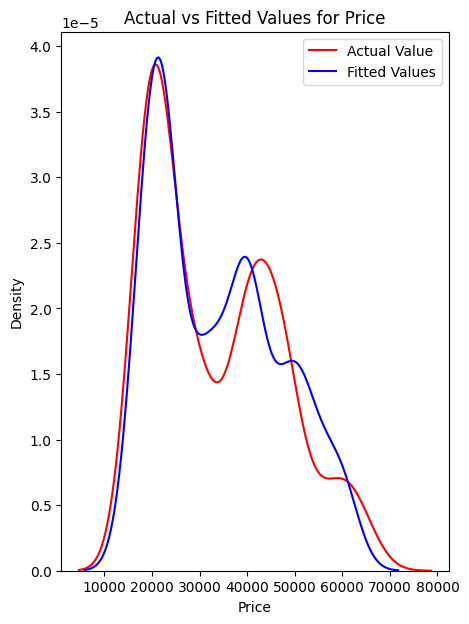

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = randmf.predict(X_test)

plt.figure(figsize=(5, 7))

sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.close()


In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np
y_train_pred = randmf.predict(X_train)

y_test = np.array(y_test)


def AUC(y_test, y_pred):
    count = 0
    for i in range(1,len(y_test)):
        if (y_test[i] - y_test[i-1]) * (y_pred[i] - y_pred[i-1]) > 0:
            count += 1
    return count/(len(y_test)-1)
print("Test accuracy for train set")
#RMSE
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_train, y_train_pred)))

#MAPE
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_train,y_train_pred))
print()

print("Test accuracy for test set")
#RMSE
rmse_all = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error (RMSE):", rmse_all)

#MAPE
mape_all = mean_absolute_percentage_error(y_test, y_pred)
print(" Mean Absolute Percentage Error (MAPE):", mape_all)
print()
AUC_all = AUC(y_test, y_pred)
#AUC
print("AUC test:", AUC_all)

Test accuracy for train set
Root Mean Square Error (RMSE): 304.2569385650672
Mean Absolute Percentage Error (MAPE): 0.01503795805108614

Test accuracy for test set
Root Mean Square Error (RMSE): 2059.7901457069747
 Mean Absolute Percentage Error (MAPE): 0.05083540116699199

AUC test: 0.49691358024691357


## Feature Reduction

In [31]:
features = X_train.columns
# Get numerical feature importances
importances = list(randmf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: BTC_close            Importance: 0.35
Variable: BTC_high             Importance: 0.35
Variable: BTC_low              Importance: 0.18
Variable: BTC_open             Importance: 0.09
Variable: JP225                Importance: 0.02
Variable: S&P500               Importance: 0.01
Variable: BTC_volume           Importance: 0.0
Variable: Active_Addr_Cnt      Importance: 0.0
Variable: Difficulty           Importance: 0.0
Variable: Mean_Block_Size(in_bytes) Importance: 0.0
Variable: Sum_Block_Weight     Importance: 0.0
Variable: Total_Fees(USD)      Importance: 0.0
Variable: Mean_Hashrate        Importance: 0.0
Variable: Xfer_Cnt             Importance: 0.0
Variable: Mean_Tx_size(native_units) Importance: 0.0
Variable: ETH                  Importance: 0.0
Variable: LTC                  Importance: 0.0
Variable: DOGE                 Importance: 0.0
Variable: XRP                  Importance: 0.0
Variable: GOLD                 Importance: 0.0
Variable: SILVER               Importance: 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

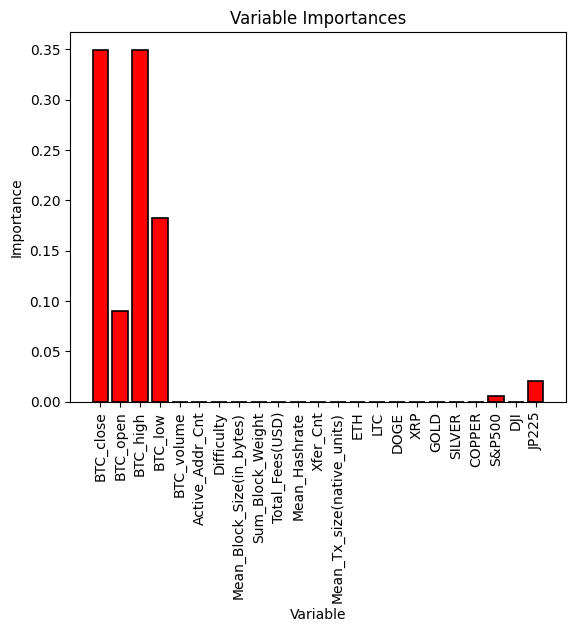

In [32]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

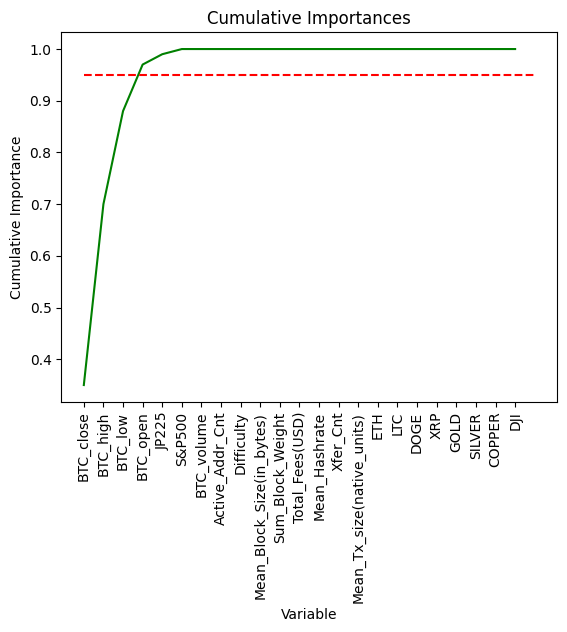

In [33]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [34]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
num = np.where(cumulative_importances > 0.95)[0][0] + 1
print('Number of features for 95% importance:', num)

Number of features for 95% importance: 4


In [35]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:num]]
print(important_feature_names)

['BTC_close', 'BTC_high', 'BTC_low', 'BTC_open']


In [36]:
train_data = X_train[important_feature_names]
test_data = X_test[important_feature_names]
# Sanity check on operations
print('Important train features shape:', train_data.shape)
print('Important test features shape:', test_data.shape)


Important train features shape: (1944, 4)
Important test features shape: (649, 4)


#### Training and Evaluating on Important Features


In [37]:
start_time = time.time()

# Train the expanded model on only the important features
randmf.fit(train_data, y_train);

# Make predictions on test data
predictions = randmf.predict(test_data)

end_time = time.time()
reduce_run_time = end_time - start_time

#RMSE
from sklearn.metrics import mean_squared_error
rmse_reduce = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse_reduce)
print()

#MAPE
mape_reduce = np.average(np.abs((y_test - predictions) / y_test))
print("MAPE:", mape_reduce)
print()

AUC_reduce = AUC(np.array(y_test), predictions)
print("AUC test:", AUC_reduce )

RMSE: 1990.497864498489

MAPE: 0.046948695831261364

AUC test: 0.4783950617283951


#### Normalization with original data

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalize the features using MinMaxScaler for the training dataset
scaler = MinMaxScaler()
X_train_normalized_all = scaler.fit_transform(X_train)

# Normalize the features using the same scaler for the testing dataset
X_test_normalized_all = scaler.transform(X_test)

In [40]:
rf_regressor = RandomForestRegressor(**rf_Grid.best_params_)

start_time = time.time()
rf_regressor.fit(X_train_normalized_all, y_train)

y_pred_norma_all = rf_regressor.predict(X_test_normalized_all)

end_time = time.time()
normal_all_run_time = end_time - start_time

from sklearn.metrics import mean_squared_error

#RMSE
from sklearn.metrics import mean_squared_error
rmse_normal_all = np.sqrt(mean_squared_error(y_test, y_pred_norma_all))
print("RMSE:", rmse_normal_all)
print()

#MAPE
mape_normal_all = np.average(np.abs((y_test - y_pred_norma_all) / y_test))
print("MAPE:", mape_normal_all)
print()

AUC_normal_all = AUC(np.array(y_test), y_pred_norma_all)
print("AUC test:", AUC_normal_all )

RMSE: 2060.569670335144

MAPE: 0.04999911521236554

AUC test: 0.4799382716049383


#### Normalization with Importance Features

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalize the features using MinMaxScaler for the training dataset
scaler = MinMaxScaler()
X_train_normalized_reduce = scaler.fit_transform(train_data)

# Normalize the features using the same scaler for the testing dataset
X_test_normalized_reduce = scaler.transform(test_data)

In [42]:
rf_regressor = RandomForestRegressor(**rf_Grid.best_params_)

start_time = time.time()
rf_regressor.fit(X_train_normalized_reduce, y_train)

y_pred_norma_reduce = rf_regressor.predict(X_test_normalized_reduce)

end_time = time.time()
normal_reduce_run_time = end_time - start_time

from sklearn.metrics import mean_squared_error

#RMSE
from sklearn.metrics import mean_squared_error
rmse_normal_reduce = np.sqrt(mean_squared_error(y_test, y_pred_norma_reduce))
print("RMSE:", rmse_normal_reduce)
print()

#MAPE
mape_normal_reduce = np.average(np.abs((y_test - y_pred_norma_reduce) / y_test))
print("MAPE:", mape_normal_reduce)
print()

AUC_normal_reduce = AUC(np.array(y_test), y_pred_norma_reduce)
print("AUC test:", AUC_normal_reduce)

RMSE: 2003.3838063867495

MAPE: 0.046741089369123696

AUC test: 0.4737654320987654


## Summary statistical table

In [43]:
def print_results(AUC_all, rmse_all, mape_all, all_run_time, AUC_reduce, rmse_reduce, mape_reduce, reduce_run_time, 
                  AUC_normal_all, rmse_normal_all, mape_normal_all, normal_all_run_time,
                 AUC_normal_reduce, rmse_normal_reduce, mape_normal_reduce, normal_reduce_run_time):
    headers = ['Type', 'Number of Features','Accuracy', 'RMSE', 'MAPE', 'Run Time (s)']
    all_results = [['All', len(importances), AUC_all, rmse_all, mape_all, all_run_time],
                   ['Reduce', len(important_feature_names), AUC_reduce, rmse_reduce, mape_reduce, reduce_run_time],
                   ['Normalization - All', len(importances), AUC_normal_all, rmse_normal_all, mape_normal_all, normal_all_run_time],
                  ['Normalization - Reduce', len(important_feature_names), AUC_normal_reduce, rmse_normal_reduce, mape_normal_reduce, normal_reduce_run_time]]

    # Calculate the maximum width for each column
    col_widths = [max(len(str(row[i])) for row in all_results + [headers]) for i in range(len(headers))]

    # Print table headers
    header_format = '  '.join(f"{{:<{width}}}" for width in col_widths)
    print(header_format.format(*headers))

    # Print separator row
    separator = '-' * (sum(col_widths) + 3 * (len(col_widths) - 1))
    print(separator)

    # Print table rows
    row_format = '  '.join(f"{{:<{width}}}" for width in col_widths)
    for result in all_results:
        index, num_features, AUC, rmse, mape, run_time = result
        print(row_format.format(index, num_features, AUC, rmse, mape, run_time))
        
print_results(AUC_all, rmse_all, mape_all, all_run_time, AUC_reduce, rmse_reduce, mape_reduce, reduce_run_time,
             AUC_normal_all, rmse_normal_all, mape_normal_all, normal_all_run_time,
             AUC_normal_reduce, rmse_normal_reduce, mape_normal_reduce, normal_reduce_run_time)


Type                    Number of Features  Accuracy             RMSE                MAPE                  Run Time (s)      
----------------------------------------------------------------------------------------------------------------------------------
All                     23                  0.49691358024691357  2059.7901457069747  0.05083540116699199   16.370688915252686
Reduce                  4                   0.4783950617283951   1990.497864498489   0.046948695831261364  4.059009075164795 
Normalization - All     23                  0.4799382716049383   2060.569670335144   0.04999911521236554   16.555029153823853
Normalization - Reduce  4                   0.4737654320987654   2003.3838063867495  0.046741089369123696  3.965636968612671 


# Graph Predicted Values with Test Set

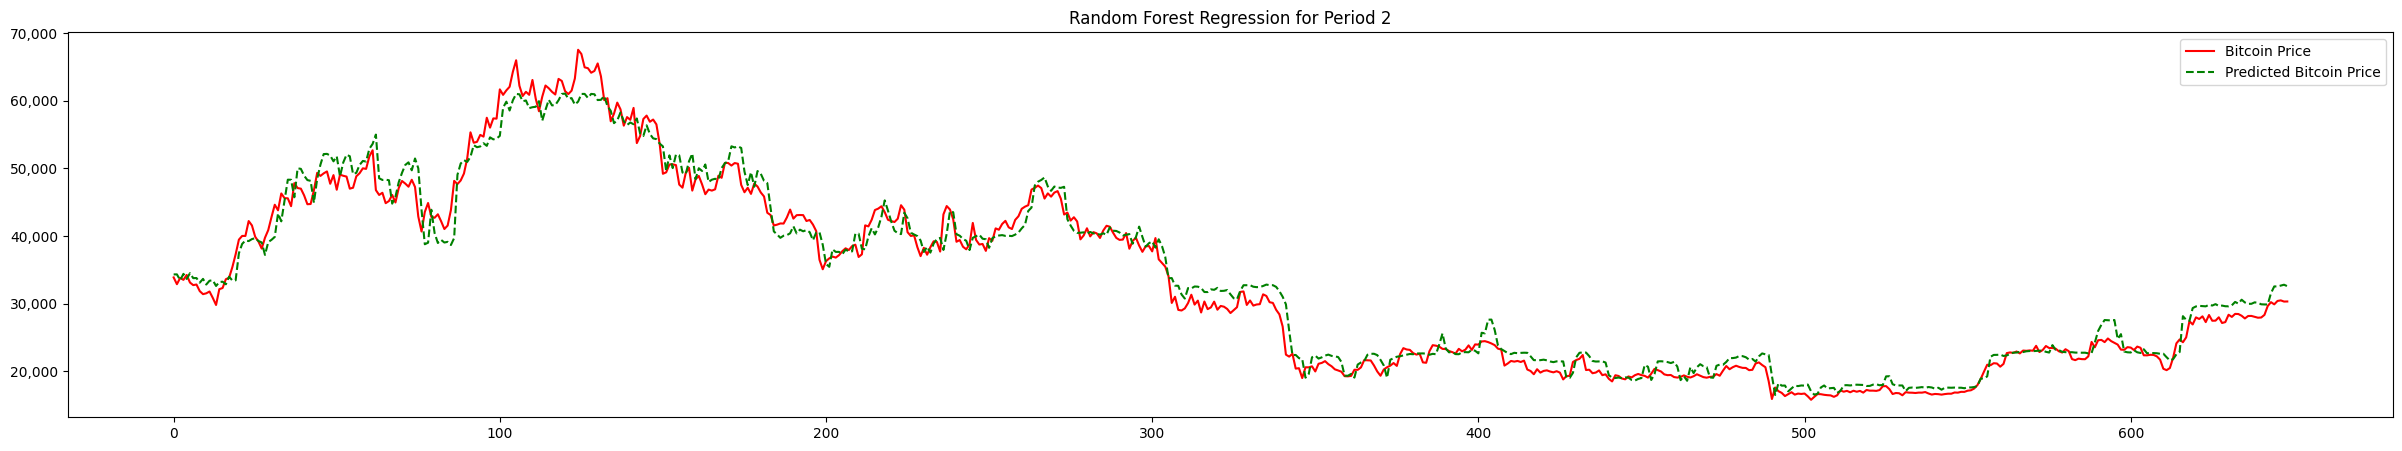

In [44]:

#hien thi ket qua du doan
fig, ax = plt.subplots(1, 1, figsize=(30, 5))
ax.plot(y_test, color = 'red', label="Bitcoin Price")
ax.plot(y_pred, color = 'green', label="Predicted Bitcoin Price", linestyle="dashed")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # .3f
plt.title("Random Forest Regression for Period 2")
plt.legend()
plt.show()

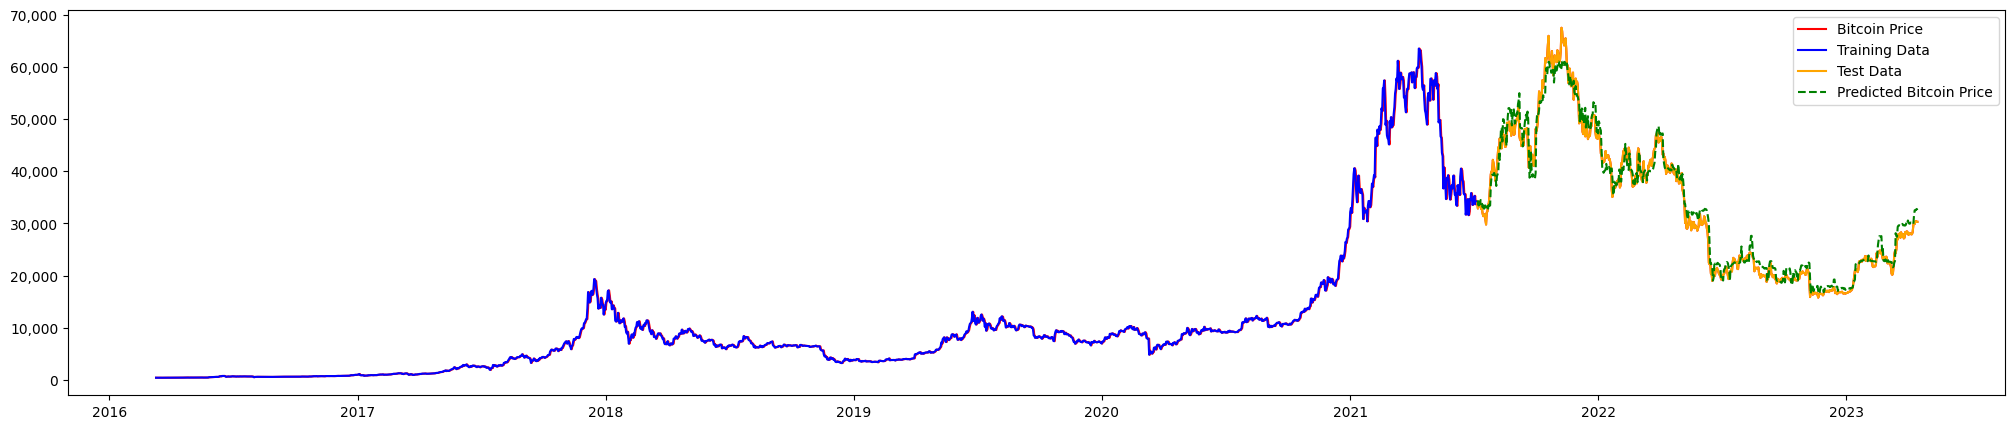

In [45]:
fig, ax = plt.subplots(figsize=(25, 5))

ax.plot(total['Date'], total['BTC_close'], color='red', label="Bitcoin Price")
ax.plot(total['Date'][:len(y_train)], y_train, color='blue', label="Training Data")
ax.plot(total['Date'][-len(y_test):], y_test, color='orange', label="Test Data")
ax.plot(total['Date'][-len(y_pred):], y_pred, color='green', label="Predicted Bitcoin Price", linestyle="dashed")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) # Định dạng đường trục y
plt.legend()
plt.show()
